# Amazon Product Review - Modeling

The purpose of this notebook is to perform some modeling on the dataset that has been manipulated in previous workbooks. I plan to explore several models, including a linear regression, an XGBoost regression model and a random forest regression model. 

In [50]:
#First I'll import the packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from bayes_opt import BayesianOptimization
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score as cv
import shap
%matplotlib inline

In [2]:
#First I need to load the data, and re-build the cluster model then use the cluster model trained on the training data to fit the test data

x_train = pd.read_csv('Data/x_train1500k.csv')
y_train = pd.read_csv('Data/y_train1500k.csv')
x_test = pd.read_csv('Data/x_test1500k.csv')
y_test = pd.read_csv('Data/y_test1500k.csv')

In [5]:
x_train.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,category,...,clusters,clusterXreviewLength,clusterXprice,clusterXavgRating,clusterXratingCount,PCA0,PCA1,PCA2,PCA3,PCA4
0,5.0,1,"01 6, 2017",A2EG2QV0ZI164K,B00004RFNI,Wesley Borner,I like how long this knife is. All of my other...,I like how long this knife is,1483660800,"['Home & Kitchen', 'Kitchen & Dining', 'Cutler...",...,1,27,12.95,4.516854,402.0,-0.273413,-0.028478,-0.034344,-0.017098,-0.028882
1,5.0,1,"04 27, 2016",AONOWQ1PYOI7Y,B004HINF3U,samantha,love!!!!,Five Stars,1461715200,"['Home & Kitchen', 'Kitchen & Dining', 'Kitche...",...,4,4,61.64,17.620253,4176.0,-0.274089,-0.028738,-0.034995,-0.017567,-0.029739
2,5.0,1,"05 28, 2018",AZ6EMT5C07WDT,B00ZWZIF0K,Bonnie,Great quality drawer organizer. I bought these...,Love it,1527465600,"['Home & Kitchen', 'Kitchen & Dining', 'Storag...",...,3,159,83.97,14.684211,279.0,-0.275357,-0.029235,-0.036275,-0.018511,-0.031477
3,5.0,1,"01 10, 2016",A2NBIHH5XND49M,B018M5WVQU,molly9,"Perfect, keeps the light our and the warmth in...",Better than expected.,1452384000,"['Home & Kitchen', 'Home Dcor', 'Window Treatm...",...,4,88,107.80,18.630273,7508.0,-0.273627,-0.028560,-0.034548,-0.017244,-0.029149
4,5.0,1,"11 17, 2016",A26RW1XASIV6BT,B01D58R1BE,katiwei,"Great sizes, fantastic quality. I love how the...","Great sizes, fantastic quality",1479340800,"['Home & Kitchen', 'Storage & Organization', '...",...,1,21,8.87,4.697674,1010.0,-0.272728,-0.028218,-0.033706,-0.016647,-0.028060


R Squared: 0.0009030833712210251


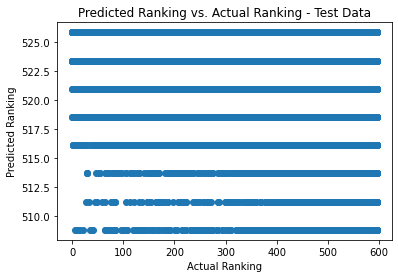

In [6]:
#For my first model I'll try taking a look 
X1_train = x_train[['overall', 'verified']]
X1_test = x_test[['overall', 'verified']]
lm1 = LinearRegression()
lm1.fit(X1_train, y_train)
preds1 = lm1.predict(X1_test)
plt.scatter(y_test, preds1)
R2_1 = r2_score(y_test, preds1)
print('R Squared:', R2_1)
_ = plt.title('Predicted Ranking vs. Actual Ranking - Test Data')
_ = plt.ylabel('Predicted Ranking')
_ = plt.xlabel('Actual Ranking')

R Squared: 0.0012660848540376746


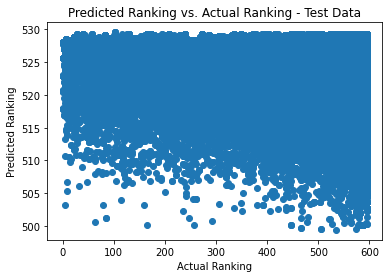

In [7]:
#For my first model I'll try taking a look 
X2_train = x_train[['overall', 'verified', 'price']]
X2_test = x_test[['overall', 'verified', 'price']]
scaler = StandardScaler()
scaler.fit(X2_train)
X2_train = scaler.transform(X2_train)
X2_test = scaler.transform(X2_test)
lm2 = LinearRegression()
lm2.fit(X2_train, y_train)
preds2 = lm2.predict(X2_test)
plt.scatter(y_test, preds2)
R2_2 = r2_score(y_test, preds2)
print('R Squared:', R2_2)
_ = plt.title('Predicted Ranking vs. Actual Ranking - Test Data')
_ = plt.ylabel('Predicted Ranking')
_ = plt.xlabel('Actual Ranking')

R Squared: 0.008352105203323412


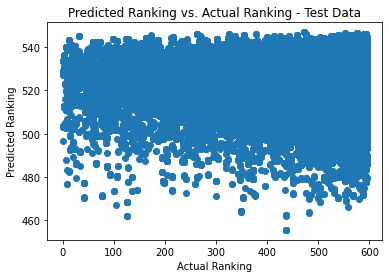

In [8]:
#For my first model I'll try taking a look 
X3_train = x_train[['overall', 'verified', 'price', 'AvgRating']]
X3_test = x_test[['overall', 'verified', 'price', 'AvgRating']]
scaler = StandardScaler()
scaler.fit(X3_train)
X3_train = scaler.transform(X3_train)
X3_test = scaler.transform(X3_test)
lm3 = LinearRegression()
lm3.fit(X3_train, y_train)
preds3 = lm3.predict(X3_test)
plt.scatter(y_test, preds3)
R2_3 = r2_score(y_test, preds3)
print('R Squared:', R2_3)
_ = plt.title('Predicted Ranking vs. Actual Ranking - Test Data')
_ = plt.ylabel('Predicted Ranking')
_ = plt.xlabel('Actual Ranking')

R Squared: 0.008474101441590998


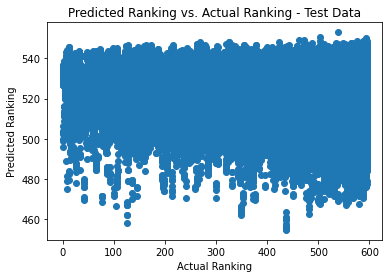

In [9]:
#For my first model I'll try taking a look 
X3_train = x_train[['overall', 'verified', 'price', 'AvgRating', 'reviewSentiment', 'summarySentiment']]
X3_test = x_test[['overall', 'verified', 'price', 'AvgRating', 'reviewSentiment', 'summarySentiment']]
scaler = StandardScaler()
scaler.fit(X3_train)
X3_train = scaler.transform(X3_train)
X3_test = scaler.transform(X3_test)
lm3 = LinearRegression()
lm3.fit(X3_train, y_train)
preds3 = lm3.predict(X3_test)
plt.scatter(y_test, preds3)
R2_3 = r2_score(y_test, preds3)
print('R Squared:', R2_3)
_ = plt.title('Predicted Ranking vs. Actual Ranking - Test Data')
_ = plt.ylabel('Predicted Ranking')
_ = plt.xlabel('Actual Ranking')

R Squared: 0.008749441150062709


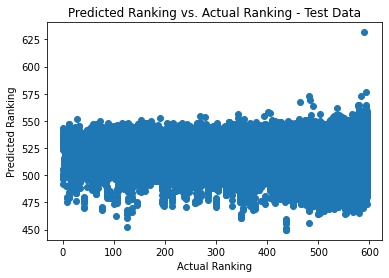

In [10]:
X4_train = x_train[['overall', 'verified', 'price', 'AvgRating', 'reviewSentiment', 'summarySentiment', 'reviewLength', 'clusters']]
X4_test = x_test[['overall', 'verified', 'price', 'AvgRating', 'reviewSentiment', 'summarySentiment', 'reviewLength', 'clusters']]
scaler = StandardScaler()
scaler.fit(X4_train)
X4_train = scaler.transform(X4_train)
X4_test = scaler.transform(X4_test)
lm4 = LinearRegression()
lm4.fit(X4_train, y_train)
preds4 = lm4.predict(X4_test)
plt.scatter(y_test, preds4)
R2_4 = r2_score(y_test, preds4)
print('R Squared:', R2_4)
_ = plt.title('Predicted Ranking vs. Actual Ranking - Test Data')
_ = plt.ylabel('Predicted Ranking')
_ = plt.xlabel('Actual Ranking')

It looks like the data may be better predicted by modeling the square root of the sales ranking rather than the ranking. This will solve the issue of the magnitude difference between the best selling and worst selling products as well. 

R Squared: 0.058055565041757906


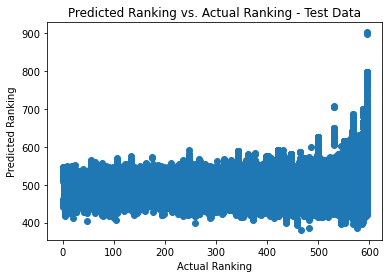

In [11]:
predictors_5 = ['overall', 'verified', 'price', 'AvgRating', 'reviewSentiment', 'summarySentiment', 'reviewLength', 'clusters',
                'clusterXreviewLength', 'clusterXprice', 'clusterXavgRating', 'clusterXratingCount', 'PCA0',
       'PCA1', 'PCA2', 'PCA3', 'PCA4']
X5_train = x_train[predictors_5]
X5_test = x_test[predictors_5]
scaler = StandardScaler()
scaler.fit(X5_train)
X5_train = scaler.transform(X5_train)
X5_test = scaler.transform(X5_test)
lm5 = LinearRegression()
lm5.fit(X5_train, np.sqrt(y_train))
preds5 = lm5.predict(X5_test)
plt.scatter(y_test, preds5**2)
R2_5 = r2_score(np.sqrt(y_test), preds5)
print('R Squared:',R2_5)
_ = plt.title('Predicted Ranking vs. Actual Ranking - Test Data')
_ = plt.ylabel('Predicted Ranking')
_ = plt.xlabel('Actual Ranking')

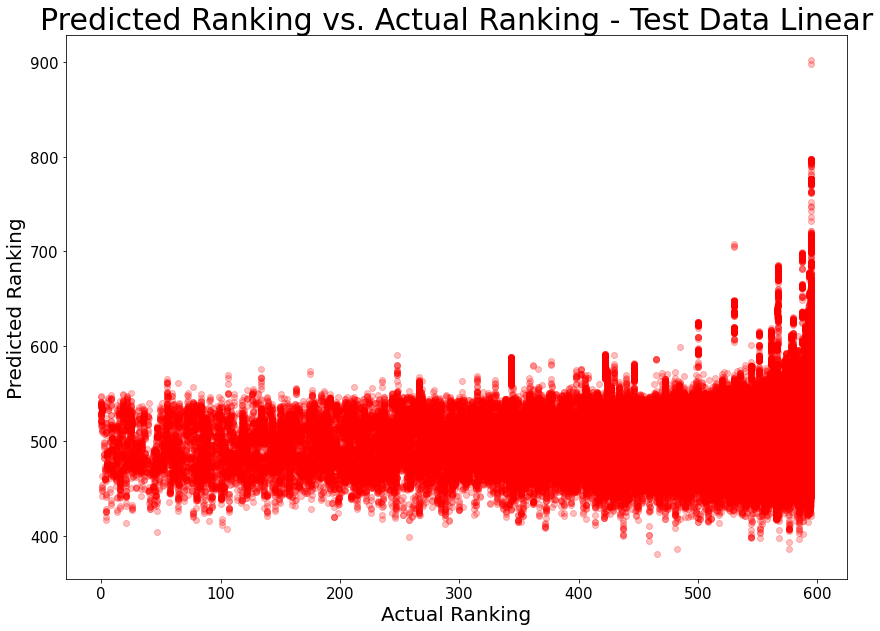

In [12]:
fig = plt.figure(figsize = (14, 10))
_ = plt.title('Predicted Ranking vs. Actual Ranking - Test Data Linear', fontsize = 30)
_ = plt.ylabel('Predicted Ranking', fontsize = 20)
_ = plt.xlabel('Actual Ranking', fontsize = 20)
_ = plt.yticks(fontsize = 15)
_ = plt.xticks(fontsize = 15)
_ = plt.scatter(y_test, preds5**2, alpha = 0.25, c = 'r')
_ = plt.savefig('LinearPredictions.png', format = 'png')

Adding the principle components and modeling the square root of the ranking makes a pretty big difference. However, next I'll plan to try out some alternative regression models. First I'll try out the XGBoost regression model. I'll start with the default hyperparameters and include the same features that I used in the previous linear model. 

R Squared: 0.17049746868535598


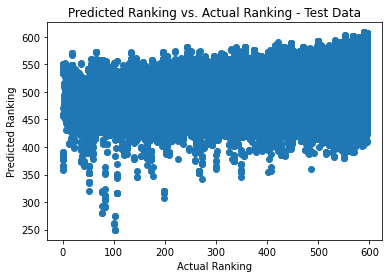

In [13]:
predictors_6 = ['overall', 'verified', 'price', 'AvgRating', 'reviewSentiment', 'summarySentiment', 'reviewLength', 'clusters',
                'clusterXreviewLength', 'clusterXprice', 'clusterXavgRating', 'clusterXratingCount', 'PCA0',
       'PCA1', 'PCA2', 'PCA3', 'PCA4']
X6_train = x_train[predictors_6]
X6_test = x_test[predictors_6]
xg6 = XGBRegressor(objective = 'reg:squarederror')
xg6.fit(X6_train, y_train)
preds = xg6.predict(X6_test)
plt.scatter(y_test, preds)
R2 = r2_score(y_test, preds)
print('R Squared:', R2)
_ = plt.title('Predicted Ranking vs. Actual Ranking - Test Data')
_ = plt.ylabel('Predicted Ranking')
_ = plt.xlabel('Actual Ranking')

It looks like the XGBoost regression model is going to perform much better. I'll try tuning the hyperparameters. 

0.14857155303034153


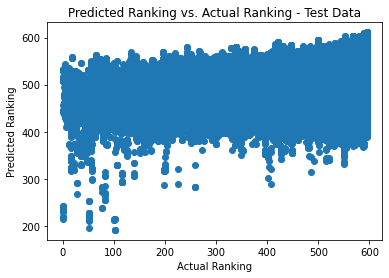

In [3]:
predictors_7= ['overall', 'verified', 'price', 'AvgRating', 'reviewSentiment', 'summarySentiment', 'reviewLength', 'clusters',
                'clusterXreviewLength', 'clusterXprice', 'clusterXavgRating', 'clusterXratingCount', 'PCA0',
       'PCA1', 'PCA2', 'PCA3', 'PCA4']
X7_train = x_train[predictors_7]
X7_test = x_test[predictors_7]
xg7 = XGBRegressor(objective = 'reg:squarederror')
xg7.fit(X7_train, np.sqrt(y_train))
preds = xg7.predict(X7_test)
plt.scatter(y_test, preds**2)
R2 = r2_score(np.sqrt(y_test), preds)
print(R2)
_ = plt.title('Predicted Ranking vs. Actual Ranking - Test Data')
_ = plt.ylabel('Predicted Ranking')
_ = plt.xlabel('Actual Ranking')

In [15]:
#I'll plan to use a bayesian optimization algorithm for hyperparater tuning.

#When using XGBoost within the Bayesian optimization algorithm, you need to define the DMatrix of X_train and y_train explicitly
#This step is automated when using the standard API, but for some reason not incorporated when tuning the model. 
dtrain = xgb.DMatrix(data = X7_train, label = np.sqrt(y_train))

# Define the Bayesian function. This basically just comes down to defining the hyperparameters you want to tune then throwing 
# the parameters into a k-fold cross validation class and returning the scoring parameter - here I use rmse. 

def bayes_tune_xgb(max_depth, gamma, n_estimators, learning_rate, subsample):
    params = {'max_depth': int(max_depth),
             'gamma': gamma, 
             'n_esitmators': int(n_estimators),
             'learning_rate': learning_rate,
             'subsample': subsample,
             'eta':0.1,
             'eval_metric': 'rmse', 
             'objective' : 'reg:squarederror'}

    cv_result = xgb.cv(params, dtrain, num_boost_round = 70, nfold = 5)
    return -1*cv_result['test-rmse-mean'].iloc[-1]

# Now I need to instanciate the Bayesian Optimizer with the function and the hyperparameters I want to optimize
# as well as the feature space I want to explore for each hyperparameter. 

xgb_bo = BayesianOptimization(bayes_tune_xgb, {'max_depth': (2, 10),
                                             'gamma': (0,1),
                                             'learning_rate': (0,1),
                                             'n_estimators': (75, 120),
                                             'subsample' : (0.25, 1)
                                             })

# Now lets get to optimizing. The function will run for a total of n_iter + init_points iterations (here it's 30)

xgb_bo.maximize(n_iter = 20, init_points = 10, acq = 'ei')

|   iter    |  target   |   gamma   | learni... | max_depth | n_esti... | subsample |
-------------------------------------------------------------------------------------
|  1        | -1.93     |  0.7925   |  0.7187   |  7.987    |  76.7     |  0.4231   |
|  2        | -2.545    |  0.8939   |  0.5599   |  4.456    |  81.56    |  0.4176   |
|  3        | -3.407    |  0.01361  |  0.03588  |  2.42     |  119.7    |  0.4887   |
|  4        | -2.659    |  0.7423   |  0.8251   |  3.243    |  107.5    |  0.4792   |
|  5        | -2.213    |  0.343    |  0.4794   |  6.696    |  119.6    |  0.629    |
|  6        | -2.421    |  0.9689   |  0.4388   |  5.835    |  85.99    |  0.8919   |
|  7        | -2.048    |  0.178    |  0.8107   |  6.664    |  100.3    |  0.7464   |
|  8        | -2.809    |  0.4519   |  0.7738   |  2.314    |  115.6    |  0.5065   |
|  9        | -2.798    |  0.6013   |  0.8334   |  2.863    |  84.27    |  0.7446   |
|  10       | -1.789    |  0.6084   |  0.9191   |  7.0

In [16]:
#Set the hyperparamters to the best performing parameters. 
params = xgb_bo.max['params']
params['max_depth'] = int(params['max_depth'])
params['n_estimators'] = int(params['n_estimators'])

In [11]:
params = {'max_depth':20, 'max_features': 0.5, 'max_samples': 0.99, 'n_estimators': 99, 'gamma': 1, 'learning_rate':1}

Rquared: 0.9274576717311512


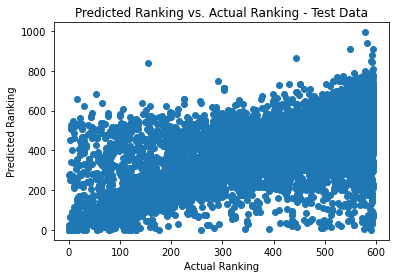

In [12]:
XGBModel = XGBRegressor(**params, objective = 'reg:squarederror')
XGBModel.fit(X7_train, np.sqrt(y_train))
preds = XGBModel.predict(X7_test)
plt.scatter(y_test, preds**2)
R2 = r2_score(y_test, preds**2)
print('Rquared:', R2)
_ = plt.title('Predicted Ranking vs. Actual Ranking - Test Data')
_ = plt.ylabel('Predicted Ranking')
_ = plt.xlabel('Actual Ranking')

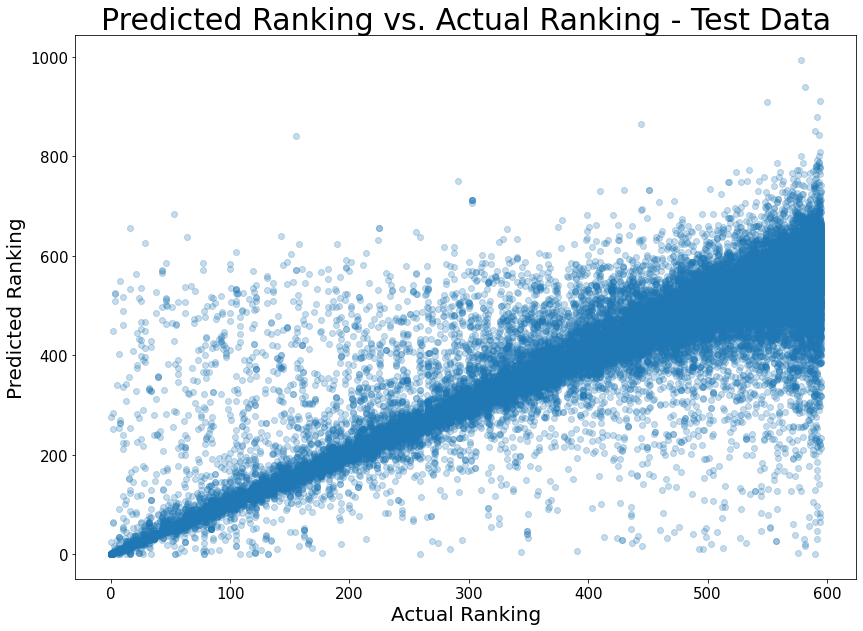

In [15]:
fig = plt.figure(figsize = (14, 10))
_ = plt.title('Predicted Ranking vs. Actual Ranking - Test Data', fontsize = 30)
_ = plt.ylabel('Predicted Ranking', fontsize = 20)
_ = plt.xlabel('Actual Ranking', fontsize = 20)
_ = plt.yticks(fontsize = 15)
_ = plt.xticks(fontsize = 15)
_ = plt.scatter(y_test, preds**2, alpha = 0.25)
_ = plt.savefig('XGBoostPred.png', format = 'png')

Now lets take a look at the most important features in the model according to XGBoost. 

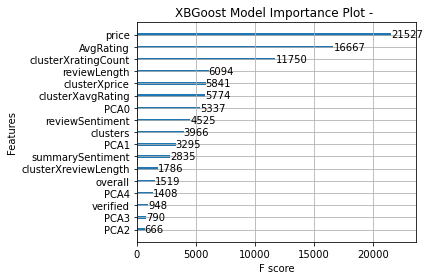

In [67]:
xgboost.plot_importance(XGBModel)
plt.tight_layout()
plt.title("XBGoost Model Importance Plot - ")
plt.savefig('XGBoost_Model_Importance.pdf', format = 'pdf')

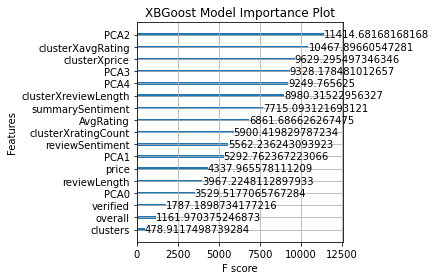

In [66]:
xgboost.plot_importance(XGBModel, importance_type = 'cover')
plt.tight_layout()
plt.title("XBGoost Model Importance Plot")
plt.savefig('XGBoost_Model_Importance_Importance_type_Cover.pdf', format = 'pdf')

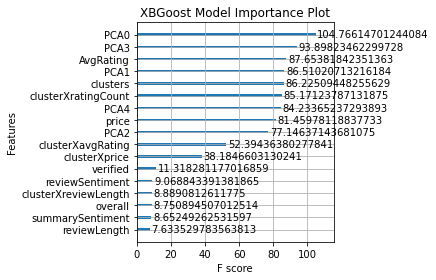

In [65]:
xgboost.plot_importance(XGBModel, importance_type = 'gain')
plt.tight_layout()
plt.title("XBGoost Model Importance Plot")
plt.savefig('XGBoost_Model_Importance_Importance_type_gain.pdf', format = 'pdf')

It appears that depending on the importance type, the feature importance is very different. This type of instability isn't uncommon, but we need a metric for determining the most imporant features to make solid and confident recommendations. Fortunately, a package has been developed based on the Shapley contributions to overall model error. The Shap package calculates the contribution for each feature to the model and can provide the Shapley number for each observation, along with the correlation to the value of the features for each prediction. 

In [43]:
explainer = shap.TreeExplainer(XGBModel)
shap_values = explainer.shap_values(X7_test)

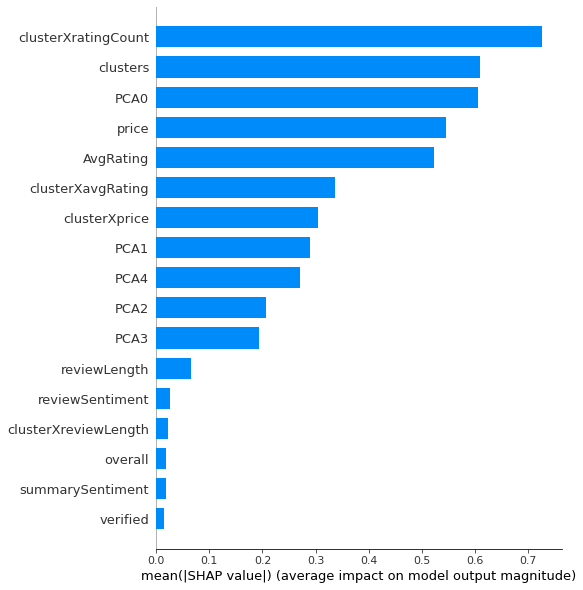

In [55]:
f = plt.figure(figsize = (30, 14))
shap.summary_plot(shap_values, X7_test, plot_type="bar", show = False)
plt.tight_layout()
f.savefig('Shap Summary Whole.png', format = 'png')

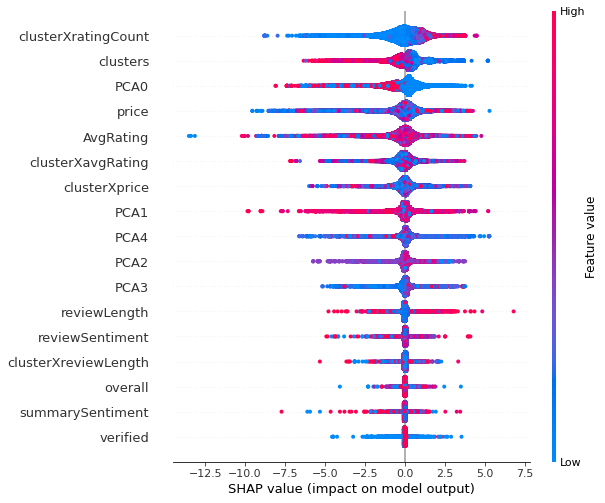

In [60]:
f = plt.figure(figsize = (30, 14))
f.tight_layout()
shap.summary_plot(shap_values, X7_test)
f.tight_layout()
f.savefig('Shap - Summary Plot.png', format = 'png')

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<Figure size 1008x720 with 0 Axes>

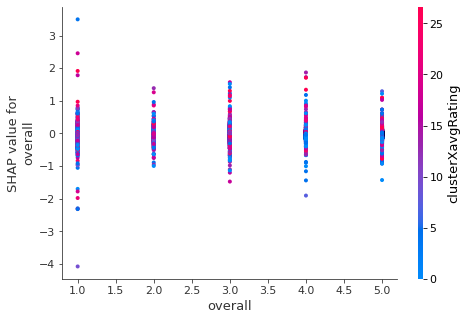

<Figure size 1008x720 with 0 Axes>

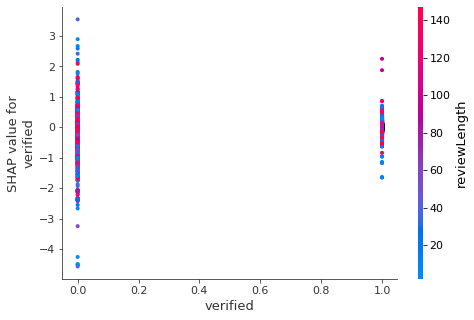

<Figure size 1008x720 with 0 Axes>

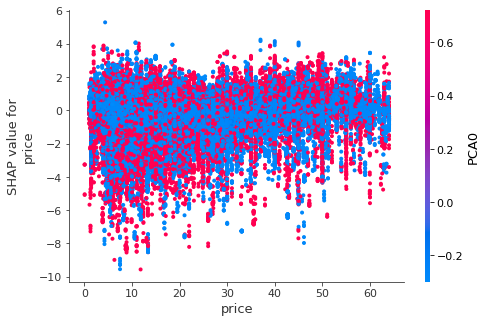

<Figure size 1008x720 with 0 Axes>

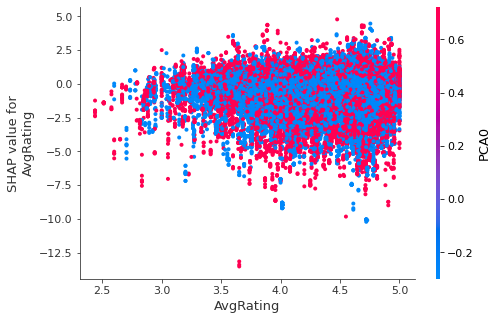

<Figure size 1008x720 with 0 Axes>

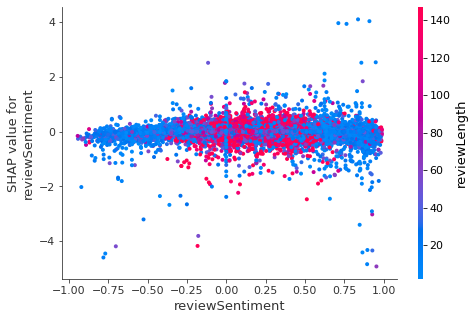

<Figure size 1008x720 with 0 Axes>

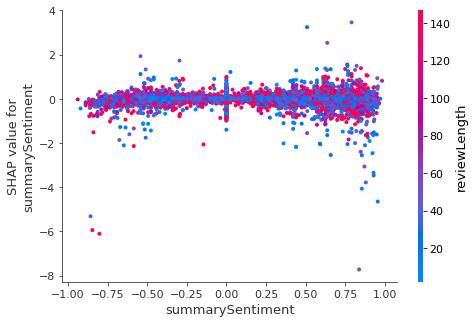

<Figure size 1008x720 with 0 Axes>

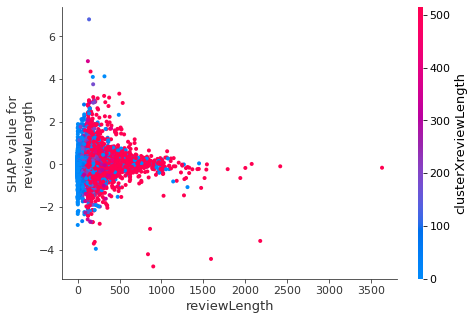

<Figure size 1008x720 with 0 Axes>

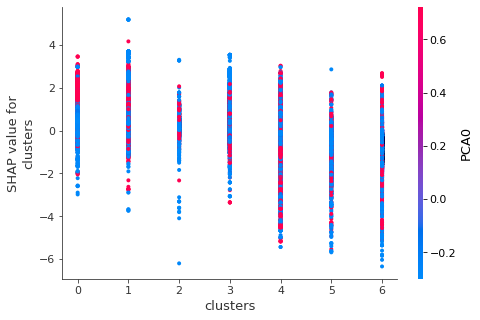

<Figure size 1008x720 with 0 Axes>

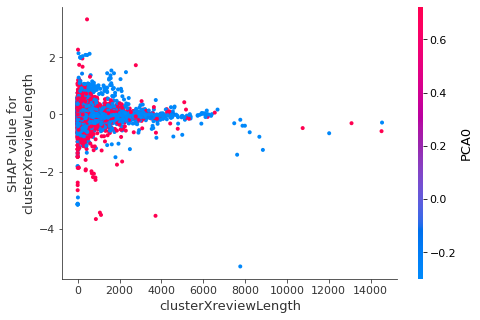

<Figure size 1008x720 with 0 Axes>

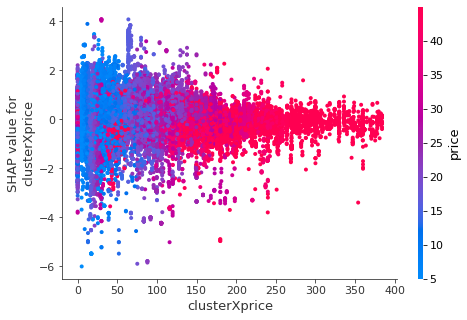

<Figure size 1008x720 with 0 Axes>

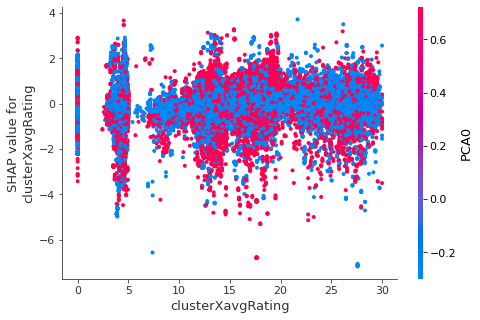

<Figure size 1008x720 with 0 Axes>

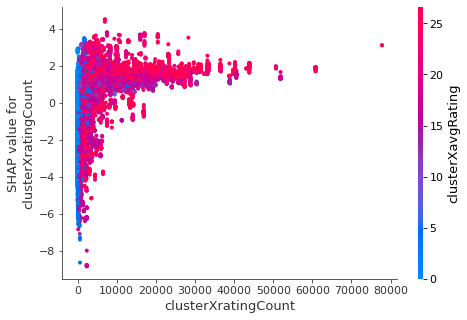

<Figure size 1008x720 with 0 Axes>

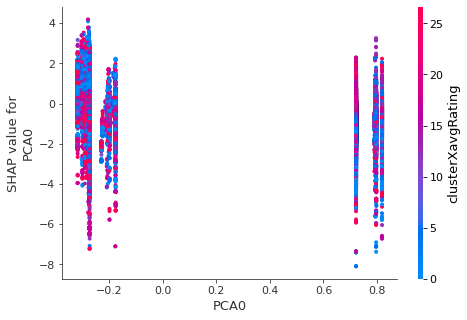

<Figure size 1008x720 with 0 Axes>

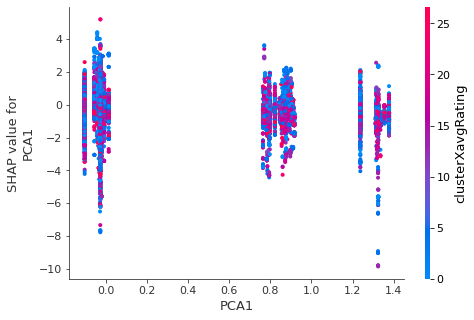

<Figure size 1008x720 with 0 Axes>

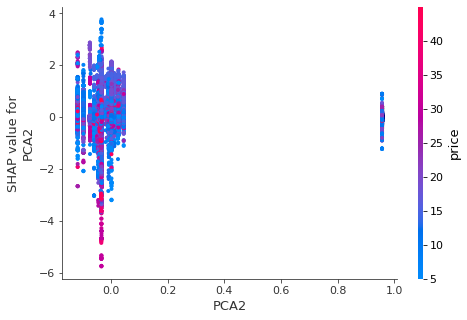

<Figure size 1008x720 with 0 Axes>

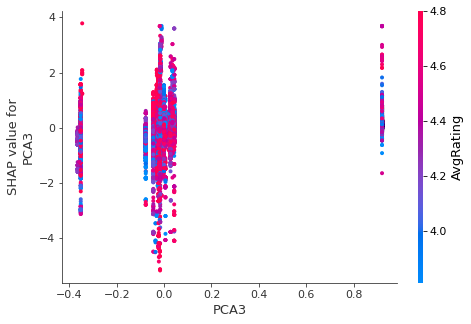

<Figure size 1008x720 with 0 Axes>

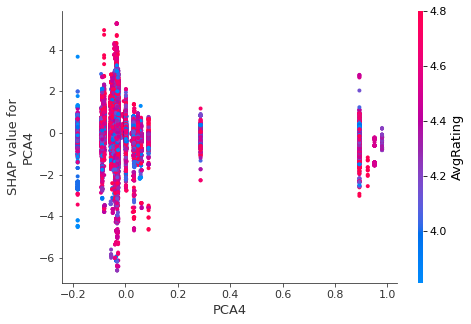

In [62]:
for name in X7_test.columns:
    fig = plt.figure(figsize = (14, 10))
    shap.dependence_plot(name, shap_values, X7_test, show = False)
    fig.tight_layout()
    fig.savefig('Shap - dependence Plot for ' + name + '.png', format = 'png')

Rquared: 0.9532068030045372


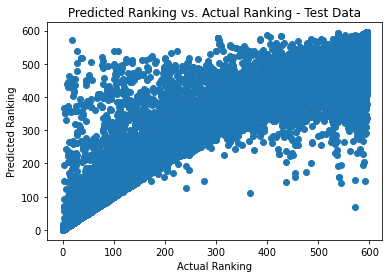

In [19]:
#Now I'll try building a random forest regressor

RF1 = RandomForestRegressor()
y_train = np.ravel(y_train)
RF1.fit(X7_train, np.sqrt(y_train))
preds = RF1.predict(X7_test)
plt.scatter(y_test, preds**2)
R2 = r2_score(y_test, preds**2)
print('Rquared:', R2)
_ = plt.title('Predicted Ranking vs. Actual Ranking - Test Data')
_ = plt.ylabel('Predicted Ranking')
_ = plt.xlabel('Actual Ranking')

Just out of curiosity I'll use another bayesian optimization algorithm to tune the hyperparameters for the random forest model

In [20]:
def bayes_tune_RF(max_depth, max_features, n_estimators, max_samples):
    params = {'max_depth': int(max_depth),
             'n_estimators': int(n_estimators),
             'max_features': float(max_features),
             'max_samples': float(max_samples)
             }

    cv_result = cv(RandomForestRegressor(**params), X = X7_train, y = np.sqrt(y_train), error_score = 0)
    return np.nanmean(cv_result)

RF_BO = BayesianOptimization(bayes_tune_RF, {'max_depth': (2, 20),
                                             'max_features': (0.5,1),
                                             'n_estimators': (75, 120),
                                             'max_samples' : (0.25, 0.99)
                                             })

RF_BO.maximize(n_iter = 20, init_points = 10, acq = 'ei')

|   iter    |  target   | max_depth | max_fe... | max_sa... | n_esti... |
-------------------------------------------------------------------------
|  1        |  0.1351   |  6.637    |  0.8056   |  0.6123   |  92.41    |
|  2        |  0.1181   |  5.473    |  0.9483   |  0.5036   |  116.6    |
|  3        |  0.6867   |  19.26    |  0.7128   |  0.6201   |  108.4    |
|  4        |  0.3624   |  12.59    |  0.556    |  0.8178   |  115.1    |
|  5        |  0.4834   |  15.98    |  0.9626   |  0.2511   |  103.2    |
|  6        |  0.1016   |  4.795    |  0.5787   |  0.8315   |  94.57    |
|  7        |  0.4214   |  13.35    |  0.7078   |  0.8175   |  91.78    |
|  8        |  0.2213   |  9.004    |  0.5296   |  0.4376   |  84.02    |
|  9        |  0.1356   |  6.092    |  0.7534   |  0.7113   |  82.92    |
|  10       |  0.08833  |  3.294    |  0.9122   |  0.2687   |  88.75    |
|  11       |  0.7205   |  20.0     |  0.5      |  0.99     |  110.1    |
|  12       |  0.7197   |  20.0     | 

In [21]:
params = RF_BO.max['params']
params['max_depth'] = int(params['max_depth'])
params['n_estimators'] = int(params['n_estimators'])

Rquared: 0.7535684728119254


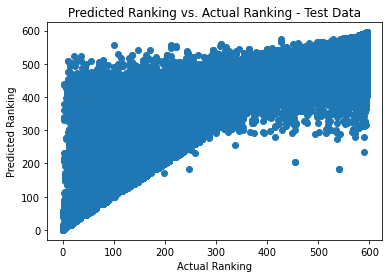

In [22]:
RF1 = RandomForestRegressor(**params)
y_train = np.ravel(y_train)
RF1.fit(X7_train, np.sqrt(y_train))
preds = RF1.predict(X7_test)
plt.scatter(y_test, preds**2)
R2 = r2_score(y_test, preds**2)
print('Rquared:', R2)
_ = plt.title('Predicted Ranking vs. Actual Ranking - Test Data')
_ = plt.ylabel('Predicted Ranking')
_ = plt.xlabel('Actual Ranking')

While the difference is minimal, the tuned XGBoost model slightly out performs the random forest model and runs much faster, so I'll stick with that model as my final model. 

In [23]:
import pickle
s = pickle.dumps(XGBModel)
from joblib import dump, load
dump(XGBModel, 'Models/XGBoostModel.joblib') 

['Models/XGBoostModel.joblib']

In [24]:
import csv

with open('bestParams.csv', 'w') as f:  
    w = csv.DictWriter(f, params.keys())
    w.writeheader()
    w.writerow(params)